<a href="https://colab.research.google.com/github/kavyasalian/Machine_learning_using_linear_regression/blob/master/linear_regression_on_Salary_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [7]:
data = pd.read_csv('Salary_Data.csv')


In [8]:
data2 = data.corr('pearson')
data2

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [9]:
abs(data2.loc['Salary']).sort_values(ascending=False)

Salary             1.000000
YearsExperience    0.978242
Name: Salary, dtype: float64

In [10]:
x = data['YearsExperience']
y = data['Salary']

In [11]:
x = np.array(x/x.mean())
y = np.array(y/y.mean())

In [12]:
n = int(0.8*len(x))
x_train = x[:n]
y_train = y[:n]

x_test = x[n:]
y_test = y[n:]

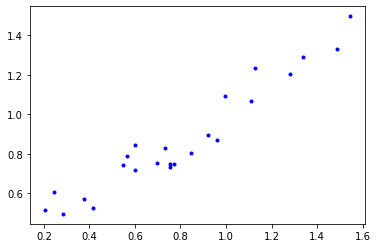

In [13]:
plt.plot(x_train, y_train, 'b.')

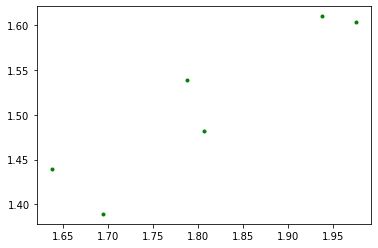

In [14]:
plt.plot(x_test, y_test, 'g.')

In [15]:
def hypothesis(a,b,x):
  return a*x + b

In [16]:
def error(a,b,x,y):
  e = 0
  m = len(y)
  for i in range(m):
    e += np.power((hypothesis(a,b,x[i])-y[i]),2)
    
    
  return (1/(2*m)) *e

In [17]:
def step_gradiet(a,b,x,y,learning_rate):
  grad_a = 0
  grad_b = 0
  m = len(x)
  for i in range(m):
    grad_a += 1/m * (hypothesis(a,b,x[i])-y[i]) *x[i]
    grad_b += 1/m * (hypothesis(a,b,x[i])-y[i])
  
  a = a- (grad_a * learning_rate)
  b = b- (grad_b * learning_rate)
  return a,b

In [18]:
def descend(initial_a, initial_b, x,y,learning_rate, iterations):
  a = initial_a
  b = initial_b
  for i in range(iterations):
    e = error(a,b,x,y)
    if i % 1000 ==0:
      print(f"Error: {e}, a: {a}, b: {b}")
    a,b = step_gradiet(a,b,x,y,learning_rate)
  return a,b

In [19]:
a = 0
b = 1
learning_rate = 0.01
iterations = 10000
final_a, final_b = descend(a,b,x_train, y_train, learning_rate, iterations)

Error: 0.04517872897356523, a: 0, b: 1
Error: 0.010750988978314053, a: 0.37394716751352014, b: 0.5970359617701994
Error: 0.0045565415888493025, a: 0.5569375146097222, b: 0.4380318341269065
Error: 0.0033380053497871166, a: 0.638098278280297, b: 0.3675095558238962
Error: 0.0030983018746340027, a: 0.6740950923803893, b: 0.33623117416287185
Error: 0.0030511487788469627, a: 0.6900605733191345, b: 0.32235843518060187
Error: 0.0030418730917052524, a: 0.6971416605758189, b: 0.3162055309493069
Error: 0.003040048431616345, a: 0.7002822986141694, b: 0.3134765651316785
Error: 0.0030396894949263524, a: 0.7016752495735904, b: 0.31226620102493585
Error: 0.0030396188869549257, a: 0.7022930579143343, b: 0.31172937448741467


In [20]:
print(error(a,b,x_train, y_train))
print(error(final_a,final_b, x_train, y_train))

0.04517872897356523
0.0030396049973588826


In [21]:
print(error(final_a, final_b, x_test, y_test))

0.0030812213676463486


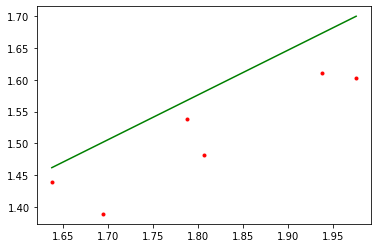

In [22]:
plt.plot(x_test, y_test, 'r.', x_test, hypothesis(final_a, final_b, x_test), 'g')

In [23]:
accuracy=100-error(final_a, final_b, x_test, y_test)
print (accuracy)

99.99691877863235


In [24]:
accuracy=100-error(final_a, final_b, x_train, y_train)

In [25]:

print (accuracy)

99.99696039500265
